Imports;
Method to find the frequent tags;
Method to build text from xml body

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from post_parser_record import PostParserRecord
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer

post_file_path = "Posts.xml"
post_reader = PostParserRecord(post_file_path)
stop_words = set(stopwords.words('english'))
limit = 5

def find_frequent_tag(post_reader, limit):
  # This methods takes in post_reader and 
  # finds the most frequent tags in questions
    lst_common_tags = []
    for question_id in post_reader.map_questions:
        question = post_reader.map_questions[question_id]
        # current question tags
        tags = question.tags
        # Do the rest
        #store tags to collect all tags
        lst_common_tags.extend(tags)
    
    #find the frequency of words
    freq_dist = FreqDist(lst_common_tags)
    #store most common in dict,
    #and save only tags in the list 
    dict_common_tags = freq_dist.most_common(limit)
    lst_common_tags = [tupp[0] for tupp in dict_common_tags]
    #############
    return lst_common_tags
# builds list of processed text for passed in tags
def build_text(common_tags_list):
    #initialize list
    text_list = []
    #create empty elements for each tag
    for i in range(len(common_tags_list)):
        text_list.append('')
    #loop through questions
    for question_id in post_reader.map_questions:
        question = post_reader.map_questions[question_id]
        #loop by tags
        for tag in question.tags:
            #loop by common tags
            for i in range(len(common_tags_list)):
                #check if tag is equal to a common tag
                if(common_tags_list[i] == tag):
                    #set body to lowercase
                    text = question.body.lower()
                    #preprocess text
                    soup = BeautifulSoup(text)
                    soup_text = soup.findAll(string=True)
                    joined_soup_text = ' '.join(soup_text)
                    final_text = "".join([char for char in joined_soup_text if char not in string.punctuation])
                    #add it to list
                    text_list[i] = text_list[i] + " " + final_text
    return text_list


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shady\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Step 2: Build wordclouds of top 30 common tokens

Common tags are  ['united-states', 'copyright', 'united-kingdom', 'criminal-law', 'contract-law']
Most common words for united-states are ['would', 'us', 'law', 'legal', 'states', 'one', 'question', 'could', 'state', 'im', 'case', 'like', 'court', 'company', 'person', 'use', 'also', 'even', 'united', 'say', 'get', 'time', 'may', 'know', 'people', 'without', 'someone', 'example', 'federal', 'laws']


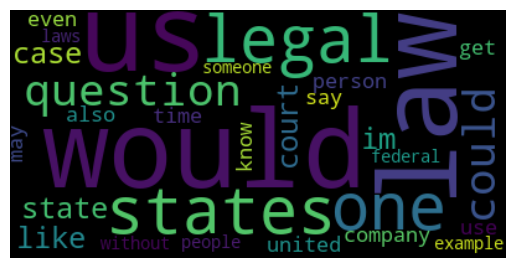

Most common words for copyright are ['copyright', 'use', 'would', 'work', 'like', 'im', 'legal', 'license', 'one', 'question', 'website', 'software', 'game', 'could', 'code', 'content', 'make', 'book', 'original', 'want', 'public', 'also', 'law', 'company', 'using', 'without', 'example', 'video', 'copyrighted', 'rights']


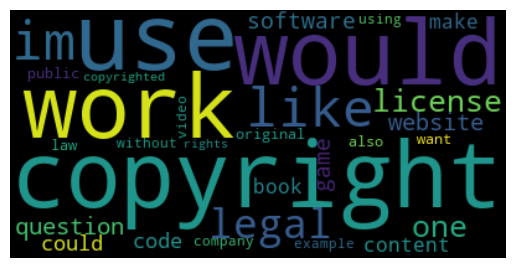

Most common words for united-kingdom are ['would', 'uk', 'company', 'law', 'legal', 'one', 'could', 'contract', 'question', 'time', 'also', 'im', 'work', 'like', 'case', 'person', '’', 'act', 'court', 'pay', 'use', 'property', 'data', 'however', 'us', 'may', 'get', 'without', 'know', 'information']


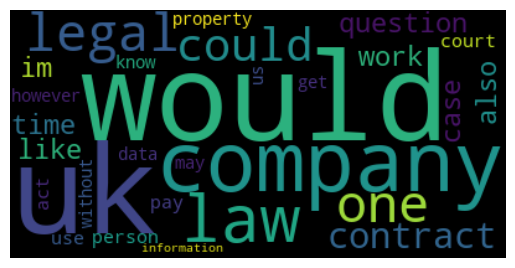

Most common words for criminal-law are ['would', 'person', 'law', 'crime', 'police', 'criminal', 'one', 'case', 'legal', 'question', 'could', 'court', 'someone', 'like', 'us', 'evidence', 'illegal', 'say', 'im', 'people', 'also', 'know', 'state', 'even', 'get', 'example', 'time', 'bob', 'act', 'laws']


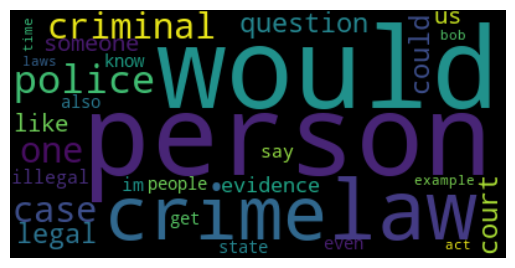

Most common words for contract-law are ['contract', 'would', 'company', 'agreement', 'one', 'law', 'legal', 'work', 'party', 'pay', 'terms', '’', 'time', 'im', 'b', 'could', 'like', 'question', 'may', 'signed', 'service', 'case', 'also', 'person', 'sign', 'example', 'new', 'even', 'clause', 'contracts']


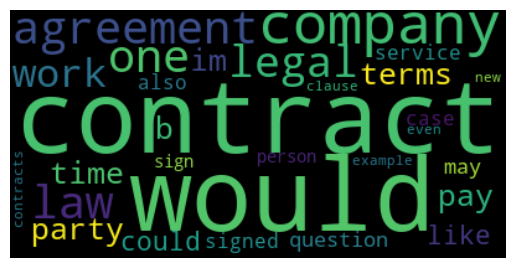

In [4]:
#create list of common tags
common_tags_list = find_frequent_tag(post_reader, limit)
print('Common tags are ', common_tags_list)
#build list of text corresponding to the common tags
text_list = build_text(common_tags_list)
#initialize future lists
tokenized_text_list = []
list_without_stopwords = []
for i in range(limit):
    #tokenize text
    tokenized_text_list.append(word_tokenize(text_list[i])) 
    #remove stopwords
    list_without_stopwords.append([word for word in tokenized_text_list[i] if word not in stop_words])
    #find 30 most common words
    most_common_words = ([tupp[0] for tupp in FreqDist(list_without_stopwords[i]).most_common(30)])
    print('Most common words for', common_tags_list[i], 'are', most_common_words)
    #create and print wordcloud of most common words
    wc = WordCloud(stopwords=[], normalize_plurals=False).generate(' '.join(most_common_words))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Step 3: Porter Stemmed Wordclouds

Most common stemmed words for united-states are ['would', 'state', 'law', 'us', 'legal', 'use', 'question', 'case', 'person', 'one', 'say', 'compani', 'like', 'court', 'could', 'im', 'make', 'get', 'work', 'right', 'unit', 'time', 'also', 'know', 'requir', 'even', 'ask', 'want', 'exampl', 'peopl']


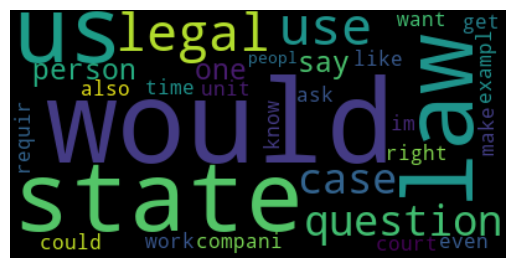

Most common stemmed words for copyright are ['copyright', 'use', 'would', 'work', 'legal', 'licens', 'like', 'make', 'question', 'im', 'websit', 'imag', 'game', 'one', 'book', 'right', 'want', 'copi', 'publish', 'law', 'creat', 'public', 'softwar', 'compani', 'content', 'origin', 'video', 'code', 'could', 'say']


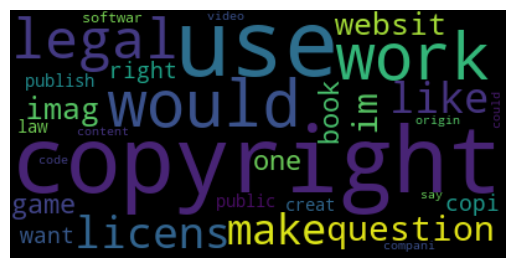

Most common stemmed words for united-kingdom are ['would', 'uk', 'compani', 'legal', 'law', 'use', 'one', 'work', 'person', 'question', 'contract', 'case', 'time', 'like', 'could', 'say', 'year', 'act', 'also', 'pay', 'right', 'im', 'get', 'ask', 'make', 'court', 'requir', 'want', 'inform', 'month']


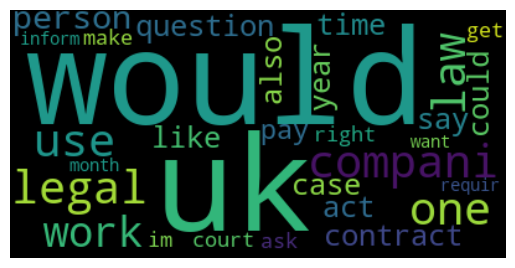

Most common stemmed words for criminal-law are ['would', 'law', 'person', 'crime', 'case', 'crimin', 'legal', 'question', 'state', 'polic', 'one', 'charg', 'say', 'like', 'use', 'court', 'could', 'someon', 'us', 'get', 'know', 'evid', 'illeg', 'make', 'time', 'defend', 'act', 'offic', 'peopl', 'im']


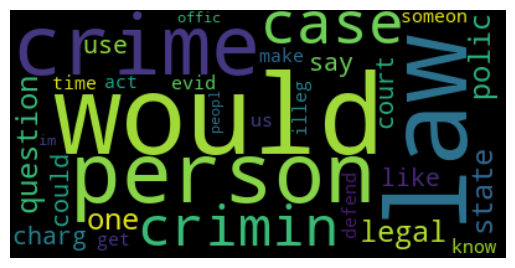

Most common stemmed words for contract-law are ['contract', 'compani', 'would', 'sign', 'agreement', 'legal', 'work', 'parti', 'law', 'term', 'one', 'use', 'pay', 'say', 'servic', 'state', 'time', 'question', 'person', 'agre', 'right', 'like', '’', 'case', 'im', 'b', 'could', 'claus', 'day', 'month']


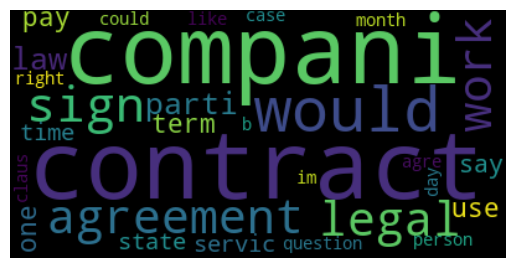

In [5]:
#initialize list for stemmed text
stem_list = []
for i in range(limit):
    #declare porterstemmer
    ps = PorterStemmer()
    #build stemmed list
    stem_list.append([ps.stem(string) for string in list_without_stopwords[i]])
    #save the 30 most common words 
    most_common_words = ([tupp[0] for tupp in FreqDist(stem_list[i]).most_common(30)])
    print('Most common stemmed words for', common_tags_list[i], 'are', most_common_words)
    #create and print wordcloud of most common words
    wc = WordCloud(stopwords=[], normalize_plurals=False).generate(' '.join(most_common_words))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Step 4: Word Distribution Diagram

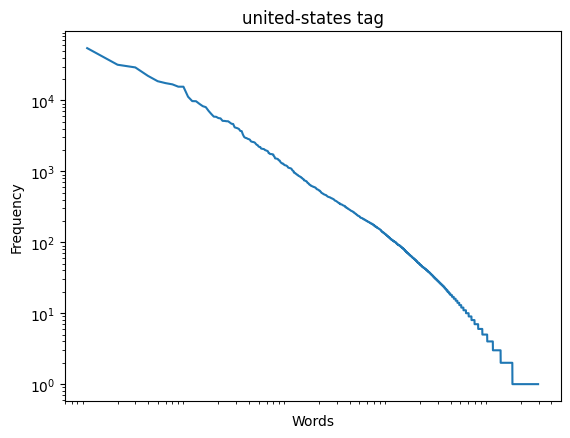

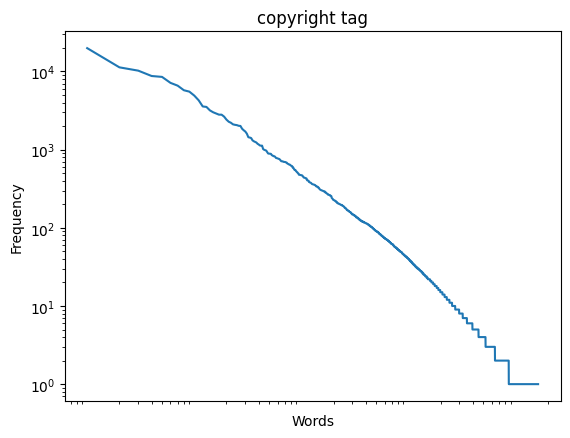

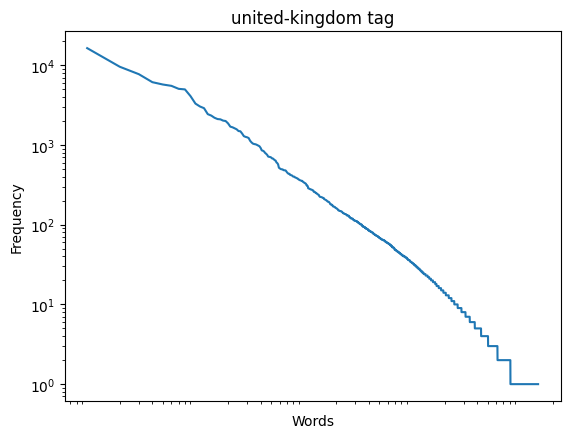

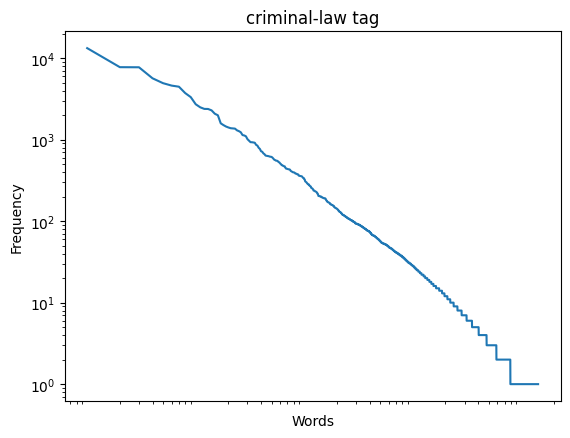

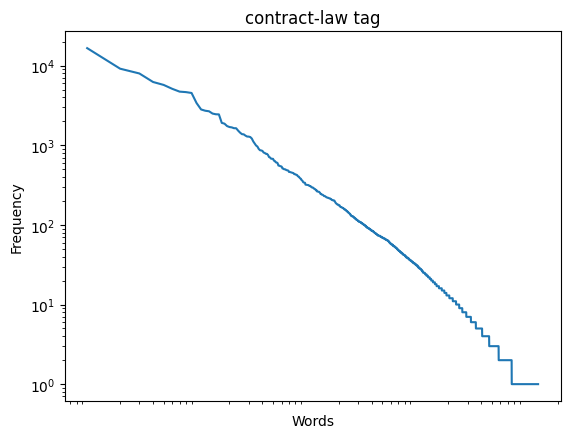

In [6]:
#loop through list
for i in range(limit):
    #find 30 most common words    
    frequencies = FreqDist(tokenized_text_list[i]).most_common(None)
    most_common_words_freq = sorted([tupp[1] for tupp in frequencies], reverse=True)
    most_common_words_rank = range(1 , len(most_common_words_freq)+1)#     
    # plot zipfs law graph
    plt.plot(most_common_words_rank, most_common_words_freq)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xscale('log')
    plt.yscale('log')
    title = common_tags_list[i] + ' tag'
    plt.title(title)
    # hides words from graph because there are too many words for such a small image
    plt.xticks([])
    plt.show()